In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
file = pd.read_csv("Wholesale customers data.csv")

file.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
x = file.iloc[:,:].values

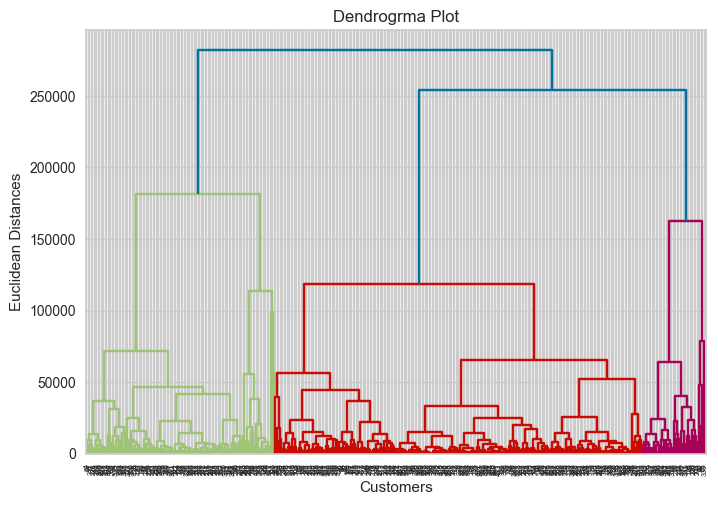

In [4]:
import scipy.cluster.hierarchy as shc 
from scipy.cluster.hierarchy import dendrogram, linkage
dendro = shc.dendrogram(shc.linkage(x, method="ward"))  
plt.title("Dendrogrma Plot")  
plt.ylabel("Euclidean Distances")  
plt.xlabel("Customers")  
plt.show()  

In [8]:
sc = StandardScaler()

xsc = sc.fit_transform(file)
xnor = normalize(xsc)

cus = pd.DataFrame(xnor)

In [29]:
pca = PCA(n_components = 2)
Xpr = pca.fit_transform(cus)
cus = pd.DataFrame(Xpr)
cus.columns = ['X1','X2']
cus.head()

,X1,X2
0,0.808828,-0.381932
1,0.914432,-0.401807
2,0.659273,-0.173878
3,-0.648142,-0.155067
4,0.562708,-0.107969


In [36]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=6, metric = 'euclidean', linkage= 'ward')
cluster.fit_predict(cus)

array([3, 3, 3, 4, 5, 3, 3, 3, 4, 3, 3, 5, 3, 3, 3, 4, 3, 2, 3, 4, 3, 4,
       2, 1, 3, 3, 4, 4, 3, 2, 2, 4, 4, 2, 4, 3, 2, 3, 3, 2, 2, 2, 3, 3,
       3, 3, 3, 1, 3, 3, 4, 4, 5, 3, 2, 4, 3, 3, 4, 2, 3, 1, 3, 3, 4, 3,
       2, 3, 2, 4, 2, 5, 2, 5, 3, 4, 2, 3, 4, 4, 4, 3, 3, 4, 3, 1, 1, 5,
       2, 2, 4, 2, 3, 5, 3, 4, 3, 4, 4, 4, 3, 3, 3, 5, 4, 4, 3, 3, 3, 3,
       4, 3, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 5, 2, 3, 2, 2, 4, 4,
       4, 4, 4, 4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 3, 4, 4, 4, 2, 4, 4, 4, 4,
       4, 3, 3, 4, 3, 3, 3, 4, 4, 3, 3, 3, 3, 4, 4, 4, 3, 3, 2, 3, 4, 3,
       2, 2, 4, 4, 2, 5, 5, 5, 4, 4, 4, 2, 3, 3, 2, 4, 4, 3, 4, 2, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 2, 4, 4, 2, 2, 4, 3, 4, 3, 2, 2, 5, 2,
       4, 2, 4, 2, 4, 4, 4, 1, 0, 1, 0, 1, 1, 0, 1,

In [37]:
cl = cluster.fit_predict(cus)

In [38]:
from sklearn.metrics import silhouette_score

In [39]:
silhouette_score(cus,cl)

0.5258275267735375

In [40]:
x = cus.values

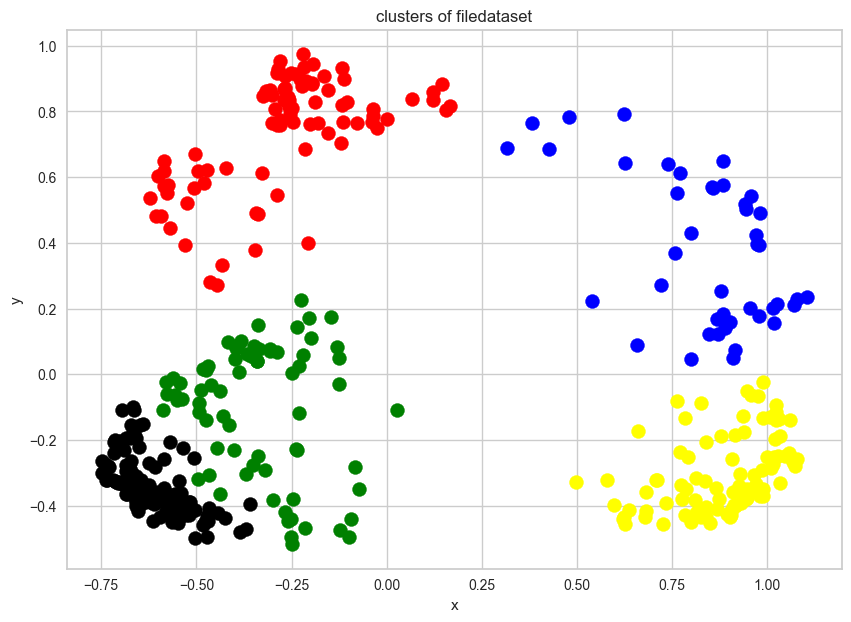

In [41]:
plt.figure(figsize=(10,7))
plt.scatter(x[cl==0,0], x[cl==0,1],s=100,c='red',label= 'Cluster1')
plt.scatter(x[cl==1,0], x[cl==1,1],s=100,c='blue',label= 'Cluster2')
plt.scatter(x[cl==2,0], x[cl==2,1],s=100,c='green',label= 'Cluster3')
plt.scatter(x[cl==3,0], x[cl==3,1],s=100,c='yellow',label= 'Cluster4')
plt.scatter(x[cl==4,0], x[cl==4,1],s=100,c='black',label= 'Cluster5')
plt.title("clusters of filedataset")
plt.xlabel('x')
plt.ylabel('y')
plt.show()